In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

#### Read the data from the given Excel FIle

In [2]:
data = pd.read_excel("Online Retail.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Column Name and its Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Items to Sale in Online Store

In [4]:
item_list = data['Description'].tolist()
item_list_unique = list(set(item_list))
item_list_unique

['FAMILY PHOTO FRAME CORNICE',
 nan,
 'VICTORIAN SEWING KIT',
 'PACK 4 FLOWER/BUTTERFLY PATCHES',
 'CLASSIC BICYCLE CLIPS ',
 'WHITE MURANO TWIST BRACELET',
 'TRAVEL CARD WALLET I LOVE LONDON',
 'OCEAN SCENT CANDLE IN JEWELLED BOX',
 'PAPER CHAIN KIT VINTAGE CHRISTMAS',
 'MR ROBOT SOFT TOY',
 'CHRISTMAS CRAFT TREE TOP ANGEL',
 'SNACK TRAY RED VINTAGE DOILY',
 'FRENCH STYLE STORAGE JAR BONBONS',
 'VINTAGE CREAM CAT FOOD CONTAINER',
 'PICNIC BOXES SET OF 3 RETROSPOT ',
 'JUMBO BAG VINTAGE DOILY ',
 'WINE BOTTLE DRESSING DARK BLUE',
 'FLOWER SHOP DESIGN MUG',
 "POPPY'S PLAYHOUSE BATHROOM",
 'WRAP BILLBOARD FONTS DESIGN',
 '5 HOOK HANGER MAGIC TOADSTOOL',
 'BLUE GLASS GEMS IN BAG',
 'SET 12 KIDS COLOUR  CHALK STICKS',
 'FELT EGG COSY LADYBIRD ',
 'JARDIN ETCHED GLASS FRUITBOWL',
 'adjustment',
 'BLUE ROSE FABRIC MIRROR',
 'CHRISTMAS METAL POSTCARD WITH BELLS',
 'JUMBO BAG ALPHABET',
 'SET/5 RED SPOTTY LID GLASS BOWLS',
 'TURQUOISE CRYSTAL+GLASS BRACELET',
 'PAPERWEIGHT CHILDHOOD MEMORIES',

#### Find the Total Sales

In [5]:
data['Sales'] = data['Quantity'] * data['UnitPrice']
data['Sales']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Sales, Length: 541909, dtype: float64

#### Find Total of NaN values per Column

In [6]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
dtype: int64

#### Find Total Sales per country

In [7]:
country_sales = pd.DataFrame(data.groupby("Country") \
["Sales"].sum()).reset_index().rename({"Sales":"TotalSales"},axis=1)
country_sales

,Country,TotalSales
0,Australia,137077.270
1,Austria,10154.320
2,Bahrain,548.400
3,Belgium,40910.960
4,Brazil,1143.600
5,Canada,3666.380
6,Channel Islands,20086.290
7,Cyprus,12946.290
8,Czech Republic,707.720
9,Denmark,18768.140


#### Create a pie chart for data

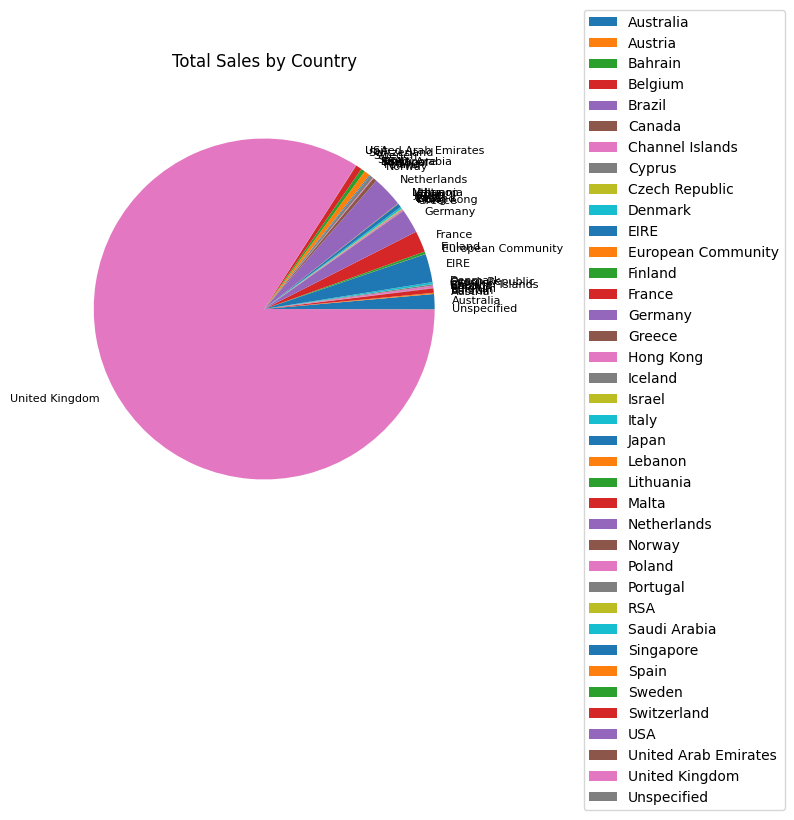

In [8]:
plt.figure(figsize=(5, 6))
plt.pie(country_sales['TotalSales'], labels=country_sales['Country'], textprops={'fontsize': 8})
plt.title('Total Sales by Country')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.75)
plt.axis('equal')  
plt.show()

#### Which country has highest sale?

In [9]:
Highest_Sale_Country = max(country_sales['TotalSales'])
Highest_Sale_Country

8187806.364

#### Best selling product by country.

In [10]:
highest_sales_Product_countrywise = data.groupby(['Country', 'Description'])['Sales'].max()
highest_sales_Product_countrywise = highest_sales_Product_countrywise.astype('int')
highest_sales_Product_countrywise

Country      Description                  
Australia     DOLLY GIRL BEAKER               216
              I LOVE LONDON MINI BACKPACK      16
             10 COLOUR SPACEBOY PEN            40
             12 PENCIL SMALL TUBE WOODLAND    211
             12 PENCILS TALL TUBE POSY         69
                                             ... 
Unspecified  WRAP POPPIES  DESIGN              10
             WRAP SUKI AND FRIENDS             10
             WRAP VINTAGE PETALS  DESIGN       10
             WRAP WEDDING DAY                  10
             ZINC METAL HEART DECORATION        2
Name: Sales, Length: 20176, dtype: int32

#### Highest Selling Item in all Items.

In [11]:
product_sales = data.groupby('Description')['Sales'].sum()
highest_selling_product = product_sales.idxmax()
highest_selling_product

'DOTCOM POSTAGE'

#### Extract Date

In [12]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day

#### Monthly Sales

In [13]:
Monthly_Sales = data.groupby('Month')['Sales'].sum(numeric_only=True)
Monthly_Sales

Month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12    1182625.030
Name: Sales, dtype: float64

#### Bar Chart for Monthly Sales

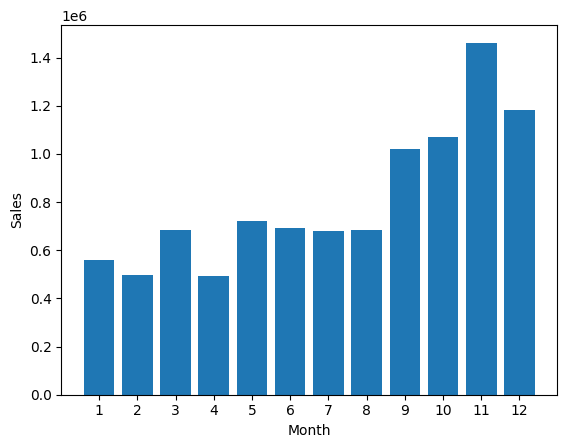

In [14]:
months = range(1,13)
plt.bar(months, Monthly_Sales)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

#### Which Month Has highest Sales and How Much??

In [15]:
Max_Sales_Per_Month = max(Monthly_Sales)
Max_Sales_Per_Month

1461756.25

#### Best Month for sales

In [16]:
monthly_sales = data.groupby('Month')['Sales'].sum()
best_month = monthly_sales.idxmax()
best_month

11

#### Find Daily Sales Country Wise

In [17]:
daily_sales_CountryWise = data.groupby(['Month','Day','Country'])['Sales'].sum()
daily_sales_CountryWise


Month  Day  Country       
1      4    Sweden              507.56
            United Kingdom    14442.92
       5    Bahrain            -205.74
            Belgium              -2.95
            EIRE               -232.67
                                ...   
12     22   France              110.40
            United Kingdom     5423.45
       23   EIRE                274.85
            Germany            1334.60
            United Kingdom    10186.86
Name: Sales, Length: 1693, dtype: float64

#### Find weekly Sales

In [18]:
weekly_total_sales = data.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['Sales'].sum()
weekly_total_sales

InvoiceDate
2010-12-05    181847.250
2010-12-12    270287.030
2010-12-19    207052.170
2010-12-26     89770.570
2011-01-02         0.000
2011-01-09     93720.930
2011-01-16    190994.960
2011-01-23    133782.910
2011-01-30    119136.810
2011-02-06    123642.180
2011-02-13    102296.930
2011-02-20    139664.580
2011-02-27    133069.930
2011-03-06    130435.560
2011-03-13    129180.960
2011-03-20    145262.610
2011-03-27    147909.800
2011-04-03    183501.710
2011-04-10    121598.220
2011-04-17    147459.771
2011-04-24    115461.250
2011-05-01     84382.660
2011-05-08    130354.310
2011-05-15    205445.230
2011-05-22    198031.530
2011-05-29    160569.820
2011-06-05    116932.520
2011-06-12    177916.870
2011-06-19    184016.500
2011-06-26    117086.710
2011-07-03    136287.440
2011-07-10    174659.170
2011-07-17    124163.170
2011-07-24    182513.960
2011-07-31    180814.851
2011-08-07    153176.200
2011-08-14    161417.020
2011-08-21    170724.890
2011-08-28    149603.500
2011-09-04   

#### Find month wise Quntity

In [19]:
Quantity_Month_Wise = data.groupby('Month')['Quantity'].sum()
Quantity_Month_Wise

Month
1     308966
2     277989
3     351872
4     289098
5     380391
6     341623
7     391116
8     406199
9     549817
10    570532
11    740286
12    568561
Name: Quantity, dtype: int64